In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [2]:
train_df = pd.read_csv("/content/train.txt", sep=";", names=["text", "label"])
test_df = pd.read_csv("/content/test.txt", sep=";", names=["text", "label"])

In [3]:
train_texts = train_df["text"].values
test_texts = test_df["text"].values
train_labels = train_df["label"].values
test_labels = test_df["label"].values

In [4]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

In [5]:
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [6]:
max_len = 100
X_train = pad_sequences(train_sequences, maxlen=max_len, padding='post')
X_test = pad_sequences(test_sequences, maxlen=max_len, padding='post')

In [7]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)

In [8]:
print("Labels:", label_encoder.classes_)
print("X_train shape:", X_train.shape)

Labels: ['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']
X_train shape: (16000, 100)


#Fully Connected Neural Network (FCNN)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model_fcnn = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=100),
    GlobalAveragePooling1D(),
    Dense(24, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # output layer
])

model_fcnn.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [10]:
history_fcnn = model_fcnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3248 - loss: 1.6369 - val_accuracy: 0.3475 - val_loss: 1.5564
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3439 - loss: 1.5720 - val_accuracy: 0.3505 - val_loss: 1.5443
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3879 - loss: 1.5421 - val_accuracy: 0.3485 - val_loss: 1.5166
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4374 - loss: 1.4966 - val_accuracy: 0.4660 - val_loss: 1.4357
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5246 - loss: 1.3780 - val_accuracy: 0.5750 - val_loss: 1.2704
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5840 - loss: 1.2243 - val_accuracy: 0.6055 - val_loss: 1.1559
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6042 - loss: 1.0973 - val_accuracy: 0.6125 - val_loss: 1.0548
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6169 - loss: 0.9895 - val_accuracy: 0.

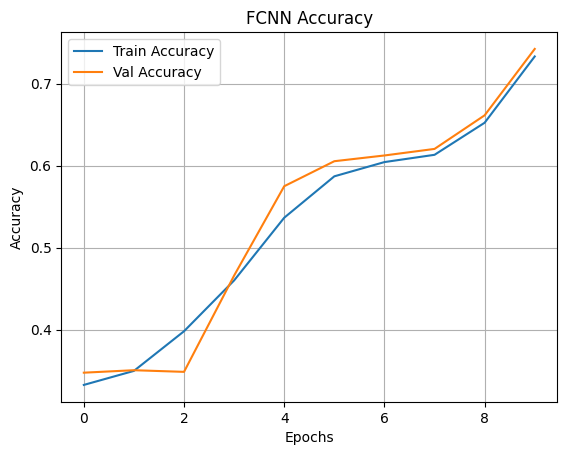

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history_fcnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_fcnn.history['val_accuracy'], label='Val Accuracy')
plt.title('FCNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

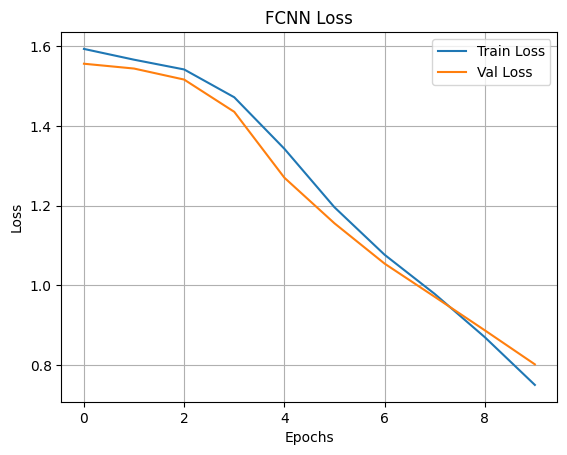

In [12]:
plt.figure()
plt.plot(history_fcnn.history['loss'], label='Train Loss')
plt.plot(history_fcnn.history['val_loss'], label='Val Loss')
plt.title('FCNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
test_loss, test_acc = model_fcnn.evaluate(X_test, y_test)
print("FCNN Test Accuracy:", test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7401 - loss: 0.8078
FCNN Test Accuracy: 0.7425000071525574


#LSTM Recurrent Neural Network

In [14]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

num_classes = len(label_encoder.classes_)
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [15]:
from tensorflow.keras.layers import Dropout

model_lstm = Sequential([
    Embedding(10000, 128, input_length=100),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [16]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)

model_lstm.compile(optimizer=optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train, y_train,
                              epochs=20,
                              validation_data=(X_test, y_test),
                              callbacks=[early_stop])

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.3479 - loss: 1.5751 - val_accuracy: 0.7085 - val_loss: 0.7911
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7356 - loss: 0.7130 - val_accuracy: 0.8285 - val_loss: 0.5296
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8693 - loss: 0.4033 - val_accuracy: 0.8580 - val_loss: 0.4035
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9214 - loss: 0.2435 - val_accuracy: 0.8895 - val_loss: 0.3562
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.9484 - loss: 0.1692 - val_accuracy: 0.8945 - val_loss: 0.3644
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9615 - loss: 0.1247 - val_accuracy: 0.8980 - val_loss: 0.3530
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9709 - loss: 0.0925 - val_accuracy: 0.8795 - val_loss: 0.4279
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9776 - loss: 0.0734 - val_

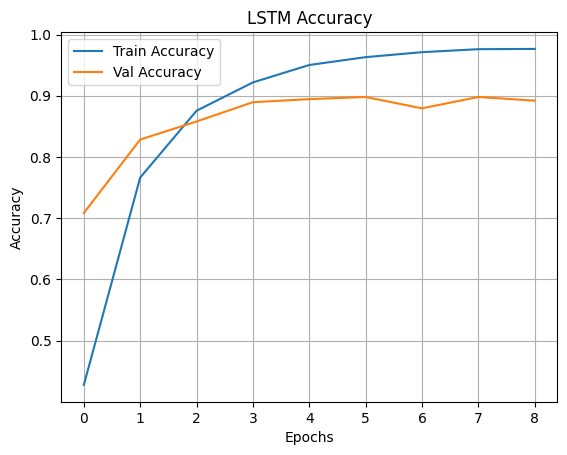

In [18]:
plt.figure()
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

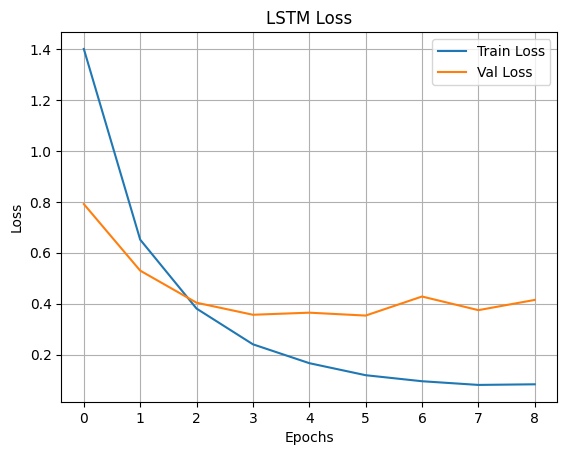

In [19]:
plt.figure()
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Val Loss')
plt.title('LSTM Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test, y_test)
print("LSTM Test Accuracy:", test_acc_lstm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8983 - loss: 0.3482
LSTM Test Accuracy: 0.8980000019073486


#BERT-based Transformer model

In [21]:
!pip install transformers datasets --quiet

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification
from torch.optim import AdamW

In [23]:
df_train = pd.read_csv("/content/train.txt", sep=";", names=["text", "label"])
df_test = pd.read_csv("/content/test.txt", sep=";", names=["text", "label"])

In [24]:
le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train['label'])
df_test['label'] = le.transform(df_test['label'])

In [25]:
df_val = df_test.sample(frac=0.5, random_state=42)
df_test = df_test.drop(df_val.index)

In [26]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_texts(texts):
    return tokenizer(texts.tolist(), padding=True, truncation=True, return_tensors='pt')

train_encodings = tokenize_texts(df_train["text"])
val_encodings = tokenize_texts(df_val["text"])
test_encodings = tokenize_texts(df_test["text"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [27]:
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [28]:
train_dataset = TextDataset(train_encodings, df_train["label"].tolist())
val_dataset = TextDataset(val_encodings, df_val["label"].tolist())
test_dataset = TextDataset(test_encodings, df_test["label"].tolist())

In [29]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(le.classes_))
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
model.train()

for epoch in range(3):
    total_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()

    print(f"Epoch {epoch+1} completed. Loss: {total_loss/len(train_loader):.4f}")

Epoch 1 completed. Loss: 0.4794
Epoch 2 completed. Loss: 0.1331
Epoch 3 completed. Loss: 0.1020


In [33]:
from torch.utils.data import DataLoader

test_loader = DataLoader(val_dataset, batch_size=16)
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        preds = torch.argmax(outputs.logits, dim=1)
        correct += (preds == batch['labels']).sum().item()
        total += batch['labels'].size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 93.20%


In [49]:
train_losses = []
val_accuracies = []

for epoch in range(3):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            preds = torch.argmax(outputs.logits, dim=1)
            correct += (preds == batch['labels']).sum().item()
            total += batch['labels'].size(0)
    val_accuracies.append(correct / total)

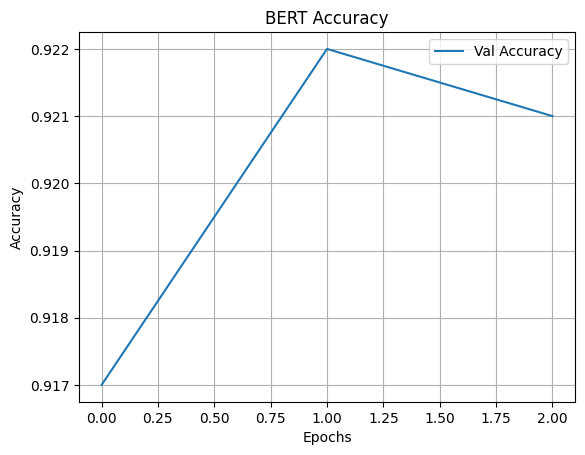

In [50]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(val_accuracies, label='Val Accuracy')
plt.title('BERT Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


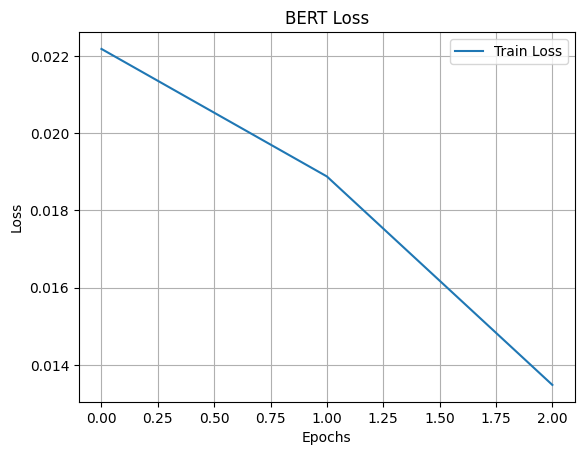

In [51]:
plt.figure()
plt.plot(train_losses, label='Train Loss')
plt.title('BERT Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


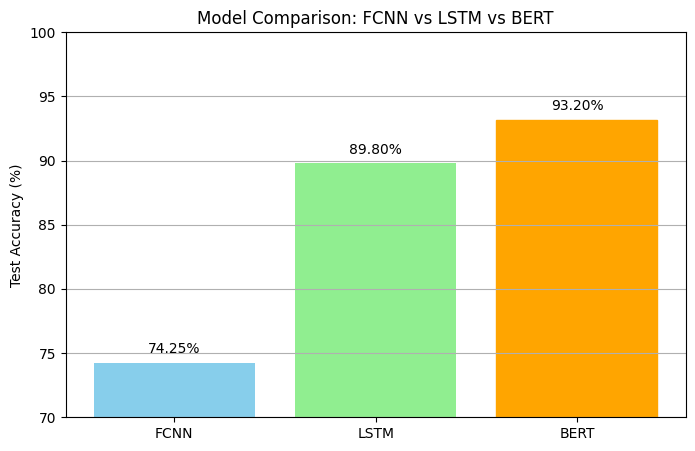

In [55]:
model_names = ['FCNN', 'LSTM', 'BERT']
accuracies = [74.25, 89.80, 93.20]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])

best_model_index = accuracies.index(max(accuracies))
bars[best_model_index].set_color('orange')

plt.ylim(70, 100)
plt.ylabel('Test Accuracy (%)')
plt.title('Model Comparison: FCNN vs LSTM vs BERT')
plt.grid(axis='y')

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.5, f"{acc:.2f}%", ha='center', va='bottom')

plt.show()